# Movie Revenue Analysis

In this project, we estimate the revenue of a movie based on given set of attributes.

## Data Preparation

In [134]:
#import libraries
import pandas as pd #dataframe
import numpy as np #array
import matplotlib.pyplot as plt #graph plotting
import seaborn as sns
import datetime #fetching day of the week
import re #evaluating regular expressions
from collections import Counter #counts elements in a list
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale 
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
import scipy.stats as stat

import statsmodels.api as sm
from scipy import stats

from sklearn.svm import LinearSVC    #Support Vector Classificationfrom sklearn.feature_selection import RFE     #Recursive Feature Elimination
from sklearn.feature_selection import RFE     #Recursive Feature Elimination
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor 

%matplotlib inline
plt.style.use("ggplot")
from statsmodels.tsa.statespace.structural import UnobservedComponents
pd.options.display.float_format = '{:.2f}'.format

In [135]:
# Get the raw data
file_usgnp = 'GNPC96.csv'
file_gnp_deflator = 'GNPDEF.csv'
file_monetary_base = 'AMBSL.csv'
us_recessions = 'USRECQ.csv'
df_usgnp = pd.read_csv(file_usgnp)
df_gnp_deflator = pd.read_csv(file_gnp_deflator)
df_monetary_base = pd.read_csv(file_monetary_base)
df_recessions = pd.read_csv(us_recessions)

In [136]:
df = df_usgnp.merge(df_gnp_deflator)

In [137]:
df.columns

Index(['DATE', 'GNPC96', 'GNPDEF'], dtype='object')

In [138]:
# MODEL

unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Unrestricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# local linear trend model with a stochastic damped cycle:
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': True, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

# The restricted model forces a smooth trend
restricted_model = {
    'level': 'smooth trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Restricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# smooth trend model with a stochastic damped cycle. Notice
# that the difference from the local linear trend model is that
# `stochastic_level=False` here.
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': False, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

In [139]:
output_mod = sm.tsa.UnobservedComponents(df['GNPC96'], **unrestricted_model)
output_res = output_mod.fit(method='powell', disp=False)

# Prices
prices_mod = sm.tsa.UnobservedComponents(df['GNPC96'], **unrestricted_model)
prices_res = prices_mod.fit(method='powell', disp=False)

prices_restricted_mod = sm.tsa.UnobservedComponents(df['GNPC96'], **restricted_model)
prices_restricted_res = prices_restricted_mod.fit(method='powell', disp=False)

# Money
money_mod = sm.tsa.UnobservedComponents(df['GNPDEF'], **unrestricted_model)
money_res = money_mod.fit(method='powell', disp=False)

money_restricted_mod = sm.tsa.UnobservedComponents(df['GNPDEF'], **restricted_model)
money_restricted_res = money_restricted_mod.fit(method='powell', disp=False)

In [140]:
print(output_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                        GNPC96   No. Observations:                  289
Model:                    local linear trend   Log Likelihood               -1606.580
                   + damped stochastic cycle   AIC                           3225.160
Date:                       Fri, 28 Jun 2019   BIC                           3247.075
Time:                               09:53:31   HQIC                          3233.945
Sample:                                    0                                         
                                       - 289                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.545e-05    101.884    2.5e-07      1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


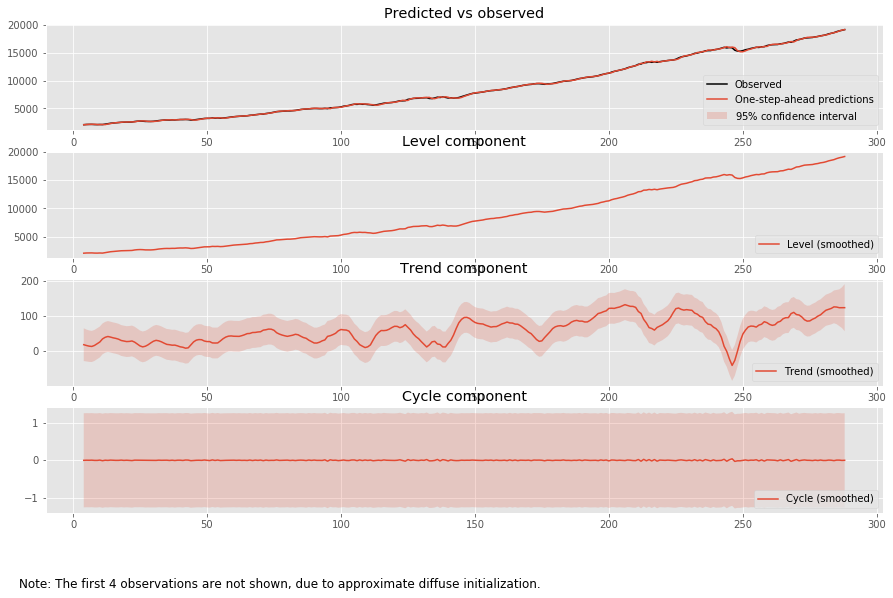

In [141]:
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));

In [142]:
#importing the file and storing it into a dataframe.
file = "classification_data.csv"
df = pd.read_csv(file, index_col = 'id')

In [143]:
df = df.dropna()

In [144]:
df.budget_year_ratio = df.budget/df.release_year

In [145]:
def categorise_budget(df):
    for i in range(df.shape[0]):
        ratio = df.budget_year_ratio[i+1]
        if ratio<2500:
            df.at[i+1, 'budget_year_ratio'] = 1
        elif ratio < 7000:
            df.at[i+1, 'budget_year_ratio'] = 2
        elif ratio < 13000:
            df.at[i+1, 'budget_year_ratio'] = 3
        elif ratio < 21500:
            df.at[i+1, 'budget_year_ratio'] = 4
        else:
            df.at[i+1, 'budget_year_ratio'] = 5
    return df

In [146]:
def categorise_popularity(df):
    for i in range(df.shape[0]):
        value = df.popularity[i+1]
        if value<3:
            df.at[i+1, 'popularity'] = 1
        elif value < 6.5:
            df.at[i+1, 'popularity'] = 2
        elif value <= 8.52:
            df.at[i+1, 'popularity'] = 3
        elif value < 11.65:
            df.at[i+1, 'popularity'] = 4
        else:
            df.at[i+1, 'popularity'] = 5
    return df

## Classification Model

Implementation using Bayesian Belief Network + Logistic Regression

## Creating Target Dataframe

In [147]:
target = df.outcome
target.index = df.index

In [132]:
#df = categorise_budget(df)
#df = categorise_popularity(df)

In [150]:
df = df.drop(['outcome', 'budget_year_ratio', 'revenue', 'release_day', 'ASIA + AFRICA', 'other_companies'], axis = 1)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)

# Feature Selection

Searching for best hyper parameters using GridSearch Cross Validation

In [153]:
def stepwise_selection(X, y, initial_list=[], threshold = 0.05, verbose=True):
    """ Perform a forward feature selection 
    based on p-value from statsmodels.api.Logit
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold - include a feature if its p-value < threshold_in
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            print('>>> selected column:', new_column, "p value = ", new_pval[new_column])
        best_pval = new_pval.min()
        if best_pval < threshold:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print("==ADDING TO MODEL==")
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        argmin = np.argmin(np.array)
    
        # backward step
        #print("now preforming backward step")
        #model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        #pvalues = model.pvalues.iloc[1:]
        #worst_pval = pvalues.max() # null if pvalues is empty
        #if worst_pval > threshold_out:
        #    changed=True
        #    worst_feature = pvalues.argmax()
        #    print("removing ", worst_feature)
        #    included.remove(worst_feature)
        #    if verbose:
        #        print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
#l = stepwise_selection(x_train, y_train, initial_list = ['budget', 'popularity'],threshold = 0.07, verbose=False)

In [159]:
#model = sm.Logit(y_train, x_train).fit()
#model.summary()

In [168]:
logreg = LogisticRegression(solver='liblinear', multi_class = 'auto', verbose = 1)

In [161]:
new_train = x_train

In [162]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train.values, i) for i in range(new_train.shape[1])]
vif["features"] = new_train.columns

In [170]:
vif

,VIF Factor,features
0,1.53,belongs_to_collection
1,2.16,budget
2,1.64,popularity
3,47.33,release_year
4,14.26,en
5,1.77,EUR + AUS
6,11.27,AMERICA
7,1.12,Paramount Pictures
8,1.15,Warner Bros.
9,1.14,Universal Pictures


In [171]:
logreg.fit(x_train,y_train)
#logreg_ncg.fit(x_train,y_train)
#logreg_lbfgs.fit(x_train,y_train)
#logreg_sag.fit(x_train,y_train)
#logreg_saga.fit(x_train,y_train)
# this wouldnt do the right variable selection

ValueError: Unknown label type: 'unknown'

In [173]:
y_train.columns

AttributeError: 'Series' object has no attribute 'columns'

In [44]:
y_pred = logreg.predict(x_train)
#y_pred_ncg = logreg_ncg.predict(x_train)
#y_pred_lbfgs = logreg_lbfgs.predict(x_train)
#y_pred_sag = logreg_sag.predict(x_train)
#y_pred_saga = logreg_saga.predict(x_train)

In [45]:
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
#cnf_matrix_ncg = metrics.confusion_matrix(y_train, y_pred_ncg)
#cnf_matrix_lbfgs = metrics.confusion_matrix(y_train, y_pred_lbfgs)
#cnf_matrix_sag = metrics.confusion_matrix(y_train, y_pred_sag)
#cnf_matrix_saga = metrics.confusion_matrix(y_train, y_pred_saga)

In [46]:
hit = logreg.score(x_train, y_train)

In [47]:
hit

0.6091666666666666

In [48]:
cnf_matrix

array([[1462,    0],
       [ 938,    0]], dtype=int64)

In [ ]:
#cnf_matrix_saga

In [ ]:
reg_pred = logreg.predict(new_train)

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
#print("senstivity", metrics.sensitivity_score(x_train, ))

## Receiver Operating Characteristic(ROC) curve


In [ ]:
y_pred_prob = logreg.predict_proba(x_train)[::,1]     #takes only the 'false' values
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob)
auc = metrics.roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
(df.budget_year_ratio<3000).sum()

## KNN Classifier

In [ ]:
l = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train,y_train)
    l.append(model.score(x_train, y_train))
m = l.index(max(l))
print("accuracy max for k = ", m+1)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
knn_pred = model.predict(x_train)

In [ ]:
y_pred_prob_knn = model.predict_proba(x_train)[::,1]     #takes only the 'false' values
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob_knn)
auc = metrics.roc_auc_score(y_train, y_pred_prob_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Ensemble

In [ ]:
ensemble_df = pd.DataFrame(reg_pred, index = x_train.index)
knn_df = pd.DataFrame(knn_pred, index = x_train.index)
ensemble_df = ensemble_df.merge(knn_df, left_index = True, right_index = True)
ensemble_df.columns = ['reg', 'knn']

In [ ]:
ensemble = LogisticRegression(solver = 'liblinear')
ensemble.fit(ensemble_df, y_train)

In [ ]:
ensemble.score(ensemble_df, y_train)

In [ ]:
y_pred_prob_ensemble = ensemble.predict_proba(ensemble_df)[::,1]     #takes only the 'false' values
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob_ensemble)
auc = metrics.roc_auc_score(y_train, y_pred_prob_ensemble)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_train